In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers



c:\Users\rubao\anaconda3\envs\pythonProject3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
##GET DATA

#Load the dataset
dataset = pd.read_csv("tmdb_5000_movies.csv")

#Print the first 5 rows
print(dataset.head())

#Show columns
print(dataset.columns)


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

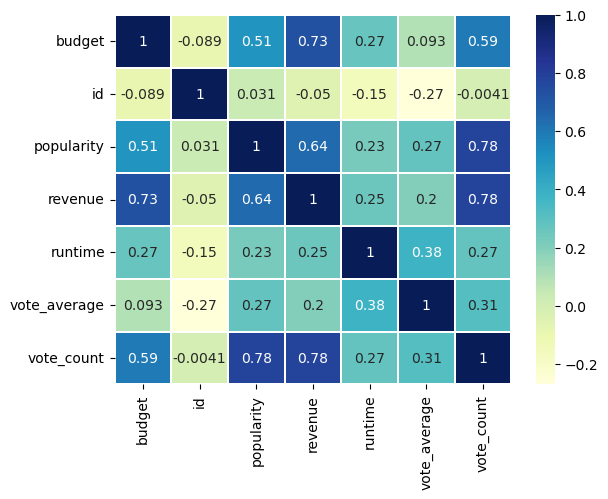

C:\Users\rubao\AppData\Local\Temp\ipykernel_5816\3576850521.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['revenue'], color="blue")


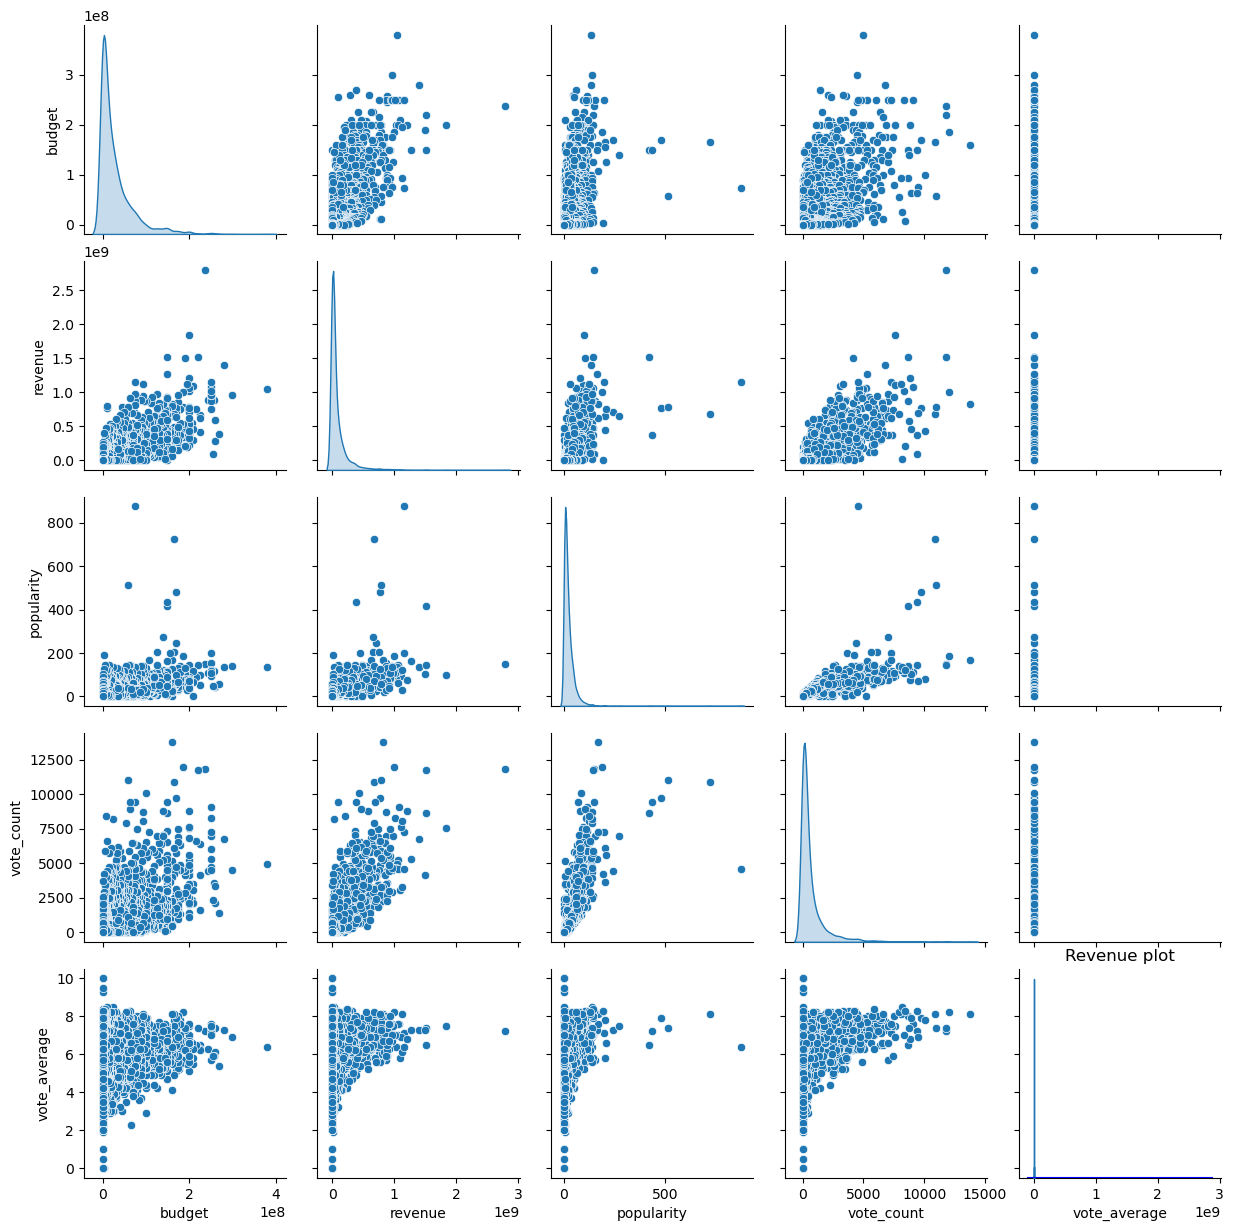

In [4]:

##ANALYSE DATA

#Plot correlation of dataset
sns.heatmap(dataset.corr(), cmap='YlGnBu', annot=True, linewidths=0.2)
plt.show()

sns.pairplot(dataset[['budget', 'revenue', 'popularity', 'vote_count', 'vote_average']], diag_kind='kde')

#Plot distribution of revenue
sns.distplot(dataset['revenue'], color="blue")
plt.title("Revenue plot")
plt.show()


In [75]:
##CLEAN DATASET

#Remove null values
dataset_log = dataset.dropna()

In [96]:
##NORMALISE THE DATA

#Apply log transformation
dataset_log = dataset.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)
dataset_log = dataset_log.dropna()

#Remove ID column and keep only numeric values
dataset_log = dataset_log.drop(['id', 'vote_average'], axis=1)
numbers = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
dataset_log = dataset_log.select_dtypes(include=numbers)

dataset_norm = dataset_log / (dataset_log.max(axis=0) + np.spacing(0))

#Show last 5 rows on normalised data
print(dataset_log.tail())
print(dataset_norm.tail())

         budget  popularity    revenue   runtime  vote_count
4773  10.203629    3.032482  14.963272  4.532599    6.628041
4781   9.998843    0.047788  16.768857  4.510860    0.693147
4791   2.639057    0.287191  16.768857  4.442651    0.693147
4796   8.853808    3.190803  12.959282  4.356709    6.490724
4801  16.523561    0.618967  16.768857  4.595120    2.079442
        budget  popularity   revenue   runtime  vote_count
4773  0.516491    0.447531  0.688012  0.853875    0.695564
4781  0.506125    0.007052  0.771032  0.849780    0.072741
4791  0.133585    0.042383  0.771032  0.836931    0.072741
4796  0.448165    0.470896  0.595868  0.820740    0.681154
4801  0.836395    0.091347  0.771032  0.865653    0.218222


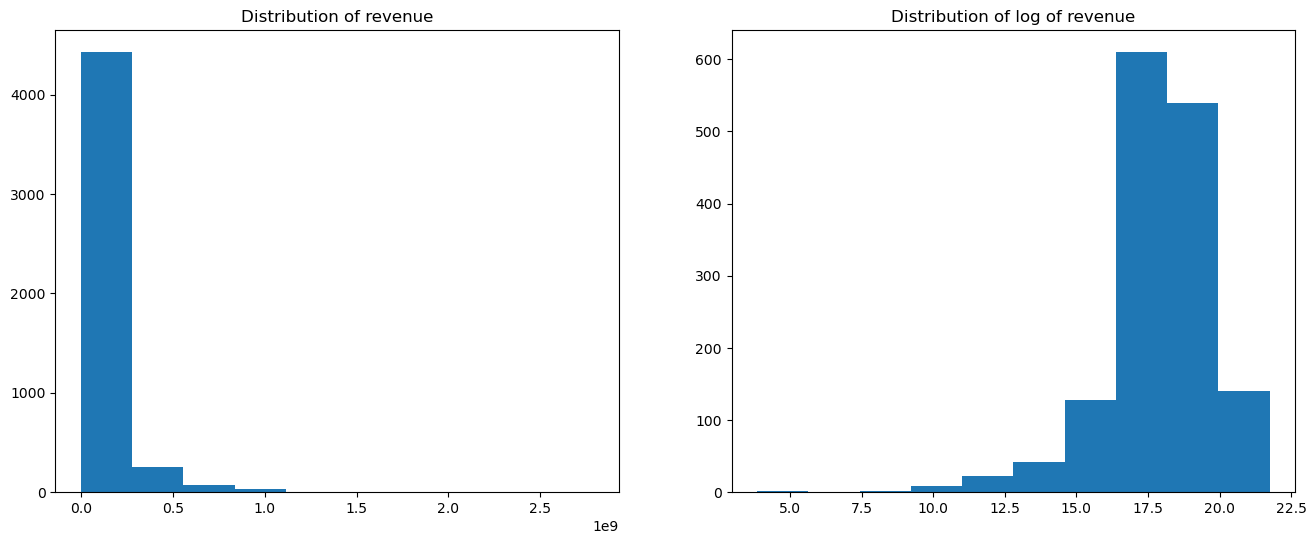

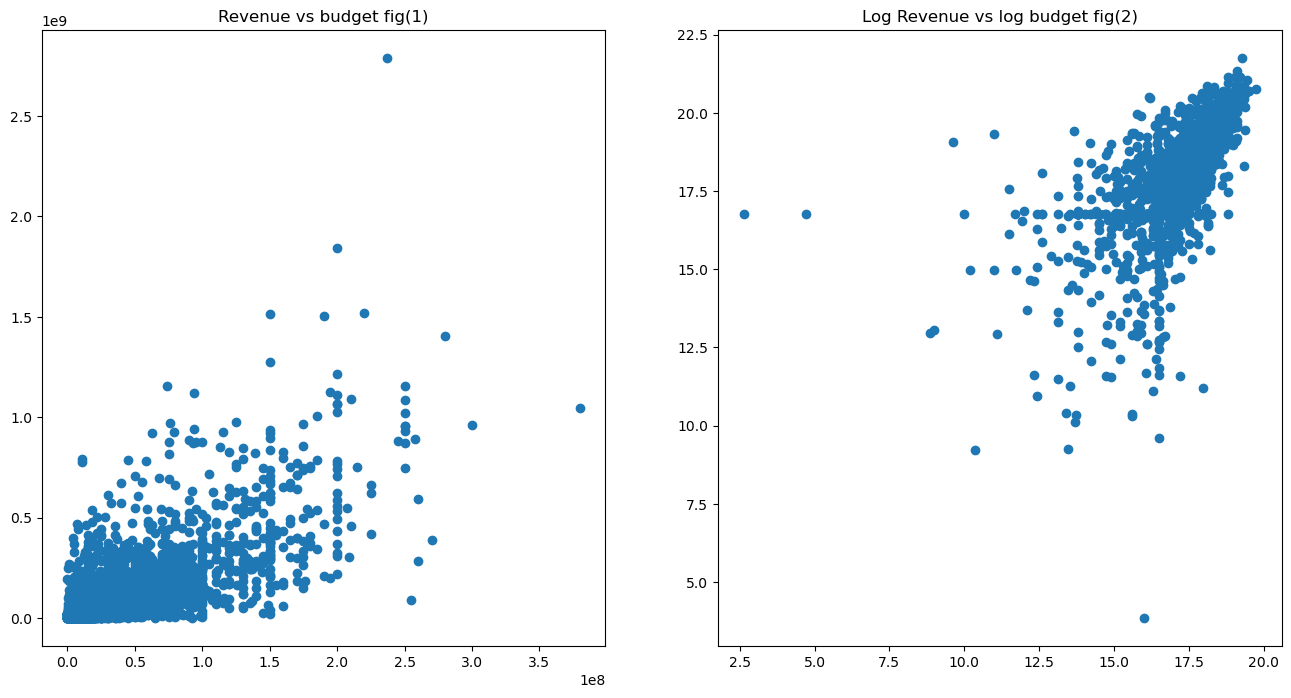

In [89]:
##PLOT DISTRIBUTION GRAPHS

#Plot distirbution of revenue and distribution of log revenue
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(dataset['revenue'])
plt.title('Distribution of revenue')
plt.subplot(1, 2, 2)
plt.hist(dataset_log['revenue'])
plt.title('Distribution of log of revenue')


#Plot relationship between budget and revenue
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(dataset['budget'], dataset['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(dataset_log['budget'], dataset_log['revenue'])
plt.title('Log Revenue vs log budget fig(2)');


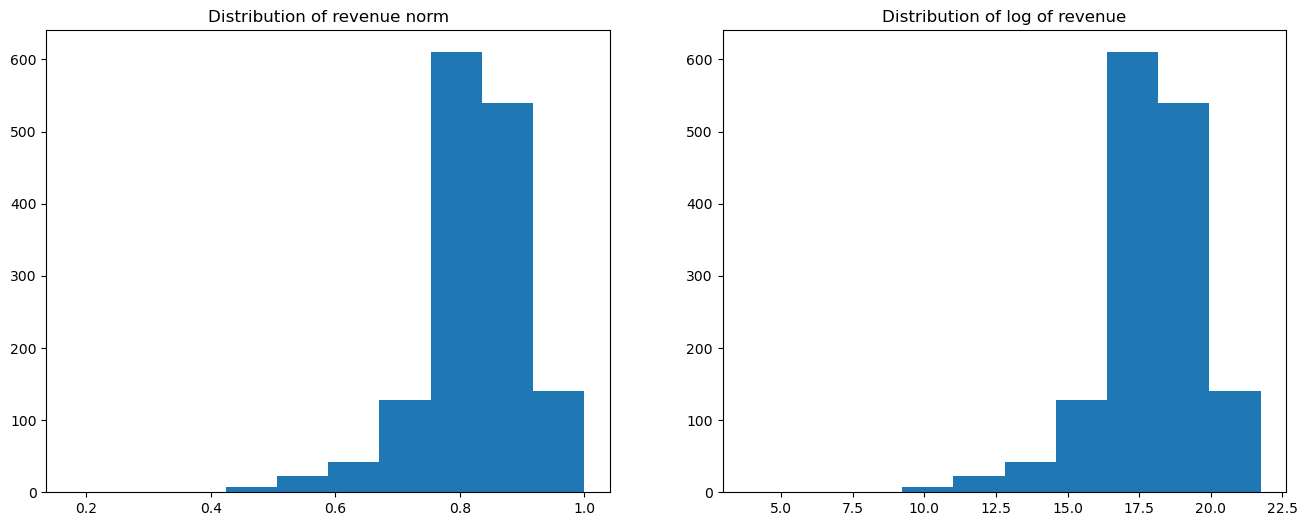

In [113]:
##TRAIN THE DATA

fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(dataset_norm['revenue'])
plt.title('Distribution of revenue norm')
plt.subplot(1, 2, 2)
plt.hist(dataset_log['revenue'])
plt.title('Distribution of log of revenue')

#Split features and labels
X = dataset_log.drop(['revenue'], axis=1)
y = dataset_log['revenue']


#Split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


#Assign features and labels
train_features = X_train
test_features = X_test

train_labels = y_train
test_label = y_test


Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_50 (Normaliza  (None, 4)                9         
 tion)                                                           
                                                                 
 dense_62 (Dense)            (None, 1)                 5         
                                                                 
Total params: 14
Trainable params: 5
Non-trainable params: 9
_________________________________________________________________
None
         loss  val_loss  epoch
495  1.378953  1.528024    495
496  1.377156  1.531347    496
497  1.376268  1.527057    497
498  1.374982  1.527604    498
499  1.375591  1.529728    499


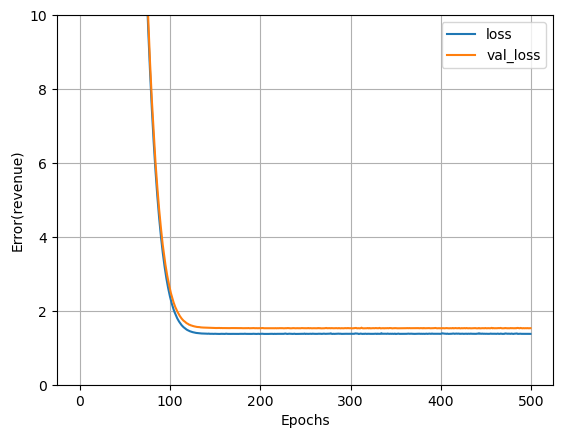

In [130]:
#Define normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

#Define All Feautes Linear Model
def linModel(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(1)
    ])

    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.01))

    return model

linear_model = linModel(normalizer)

dot_img_file = 'model_2.png'
tf.keras.utils.plot_model(linear_model, to_file=dot_img_file, show_shapes=True)

print(linear_model.summary())

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=500,
    verbose=0,
    validation_split=0.2
)


hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())


#Plot reuslts
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(0, 10)
    plt.xlabel('Epochs')
    plt.ylabel('Error(revenue)')
    plt.legend()
    plt.grid(True)

plot_loss(history)
plt.show()



In [125]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_label, verbose=0)

    

12/12 [==============================] - 0s 2ms/step


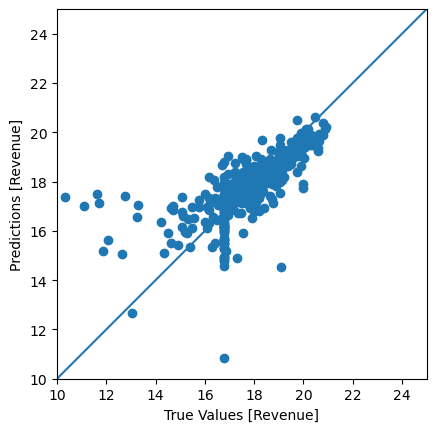

In [126]:
test_predictions = linear_model.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [Revenue]')
plt.ylabel('Predictions [Revenue]')
lims = [10, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_50 (Normaliza  (None, 4)                9         
 tion)                                                           
                                                                 
 dense_87 (Dense)            (None, 8)                 40        
                                                                 
 dense_88 (Dense)            (None, 8)                 72        
                                                                 
 dense_89 (Dense)            (None, 1)                 9         
                                                                 
Total params: 130
Trainable params: 121
Non-trainable params: 9
_________________________________________________________________
None
          loss  val_loss  epoch
2495  1.207769  1.319945   2495
2496  1.208401  1.319927   2496
2497  1.208067  1.31

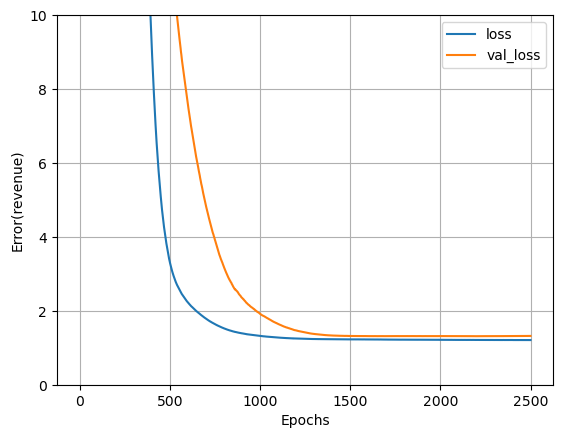

In [143]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(8, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.0001))
  return model

dnn_model = build_and_compile_model(normalizer)
print(dnn_model.summary())

dot_img_file = 'model_3.png'
tf.keras.utils.plot_model(dnn_model, to_file=dot_img_file, show_shapes=True)

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=2500)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())
plot_loss(history)
plt.show()

In [165]:
test_results['DNN_model'] = dnn_model.evaluate(test_features, test_label, verbose=0)

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression() #our 6th model
lm.fit(X_train, y_train)
test_results['lm model'] = lm.evaluate(test_features, test_label, verbose=0)

AttributeError: 'LinearRegression' object has no attribute 'evaluate'

In [145]:
pd.DataFrame(test_results, index=['Mean absolute error [Revenue]']).T

,Mean absolute error [Revenue]
linear_model,2.154186
DNN_model,1.776831


12/12 [==============================] - 0s 4ms/step


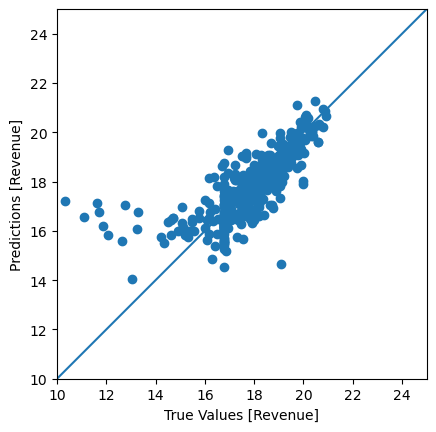

In [146]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Values [Revenue]')
plt.ylabel('Predictions [Revenue]')
lims = [10, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

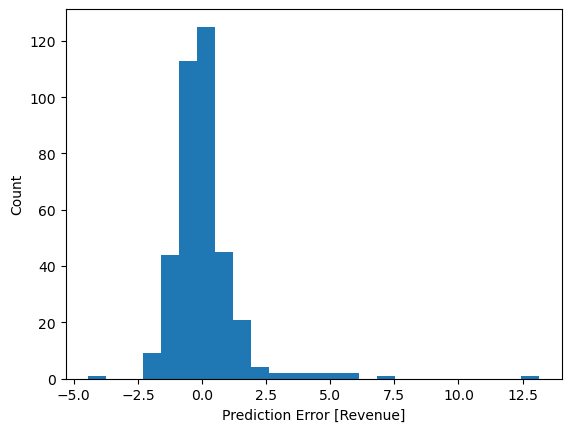

In [150]:
error = test_predictions - test_label
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Revenue]')
_ = plt.ylabel('Count')
